In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
base_path = 'Users/Sid/Numeric_text_classifier/'

In [3]:
dataset = (pd.read_csv(base_path + 'Womens_clothing_reviews.csv')
           .drop(['Unnamed: 0', 'Clothing ID'],axis = 1))
dataset.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
dataset.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [5]:
dataset.shape

(23486, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      23486 non-null  int64 
 1   Title                    19676 non-null  object
 2   Review Text              22641 non-null  object
 3   Rating                   23486 non-null  int64 
 4   Recommended IND          23486 non-null  int64 
 5   Positive Feedback Count  23486 non-null  int64 
 6   Division Name            23472 non-null  object
 7   Department Name          23472 non-null  object
 8   Class Name               23472 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.6+ MB


In [7]:
[column for column in dataset.columns if dataset[column].isnull().sum()>0]

['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']

In [8]:
dataset.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
dataset['Division Name'] = dataset['Division Name'].str.strip()
dataset['Department Name'] = dataset['Department Name'].str.strip()
dataset['Class Name'] = dataset['Class Name'].str.strip()

In [10]:
dataset[['Class Name']].isnull().sum()

Class Name    14
dtype: int64

## Visualisation
##### 1. missing value 

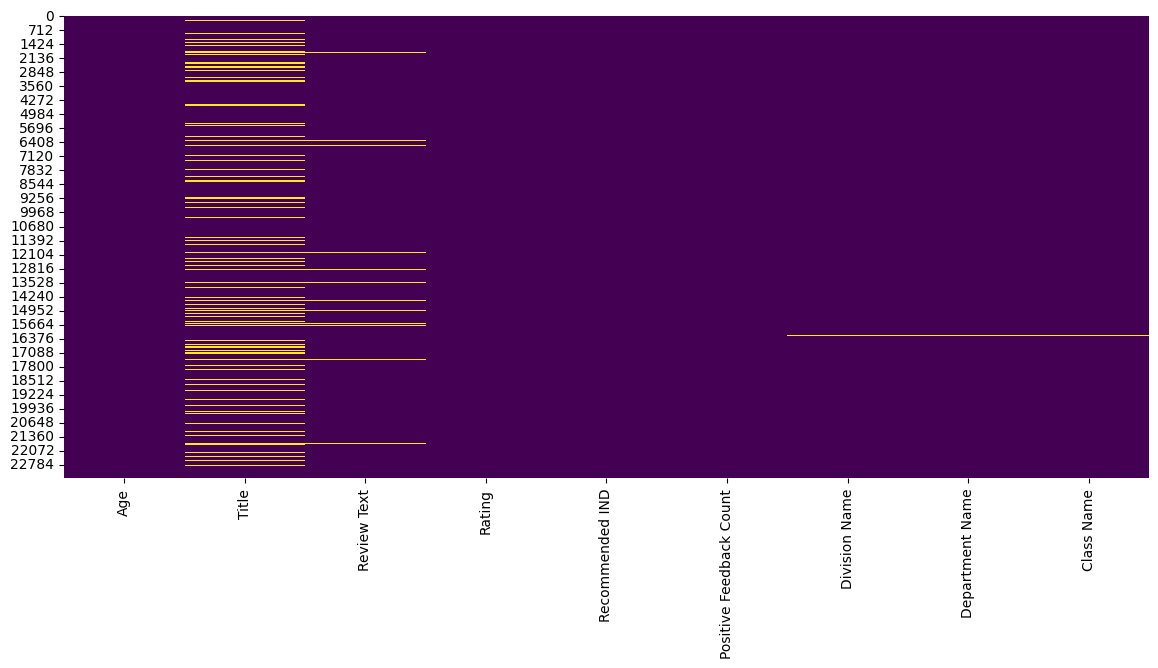

In [11]:
matplotlib.rcParams['figure.figsize'] = (14, 6)
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.show()

In [12]:
dataset = dataset.dropna(axis = 0, how ='any')
dataset.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [13]:
## Visualisation
#2. Box plot for outliers

In [14]:
dataset.dtypes

Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [15]:
numerical_features = dataset.select_dtypes(exclude=["object"])

In [16]:
len(numerical_features.columns)

4

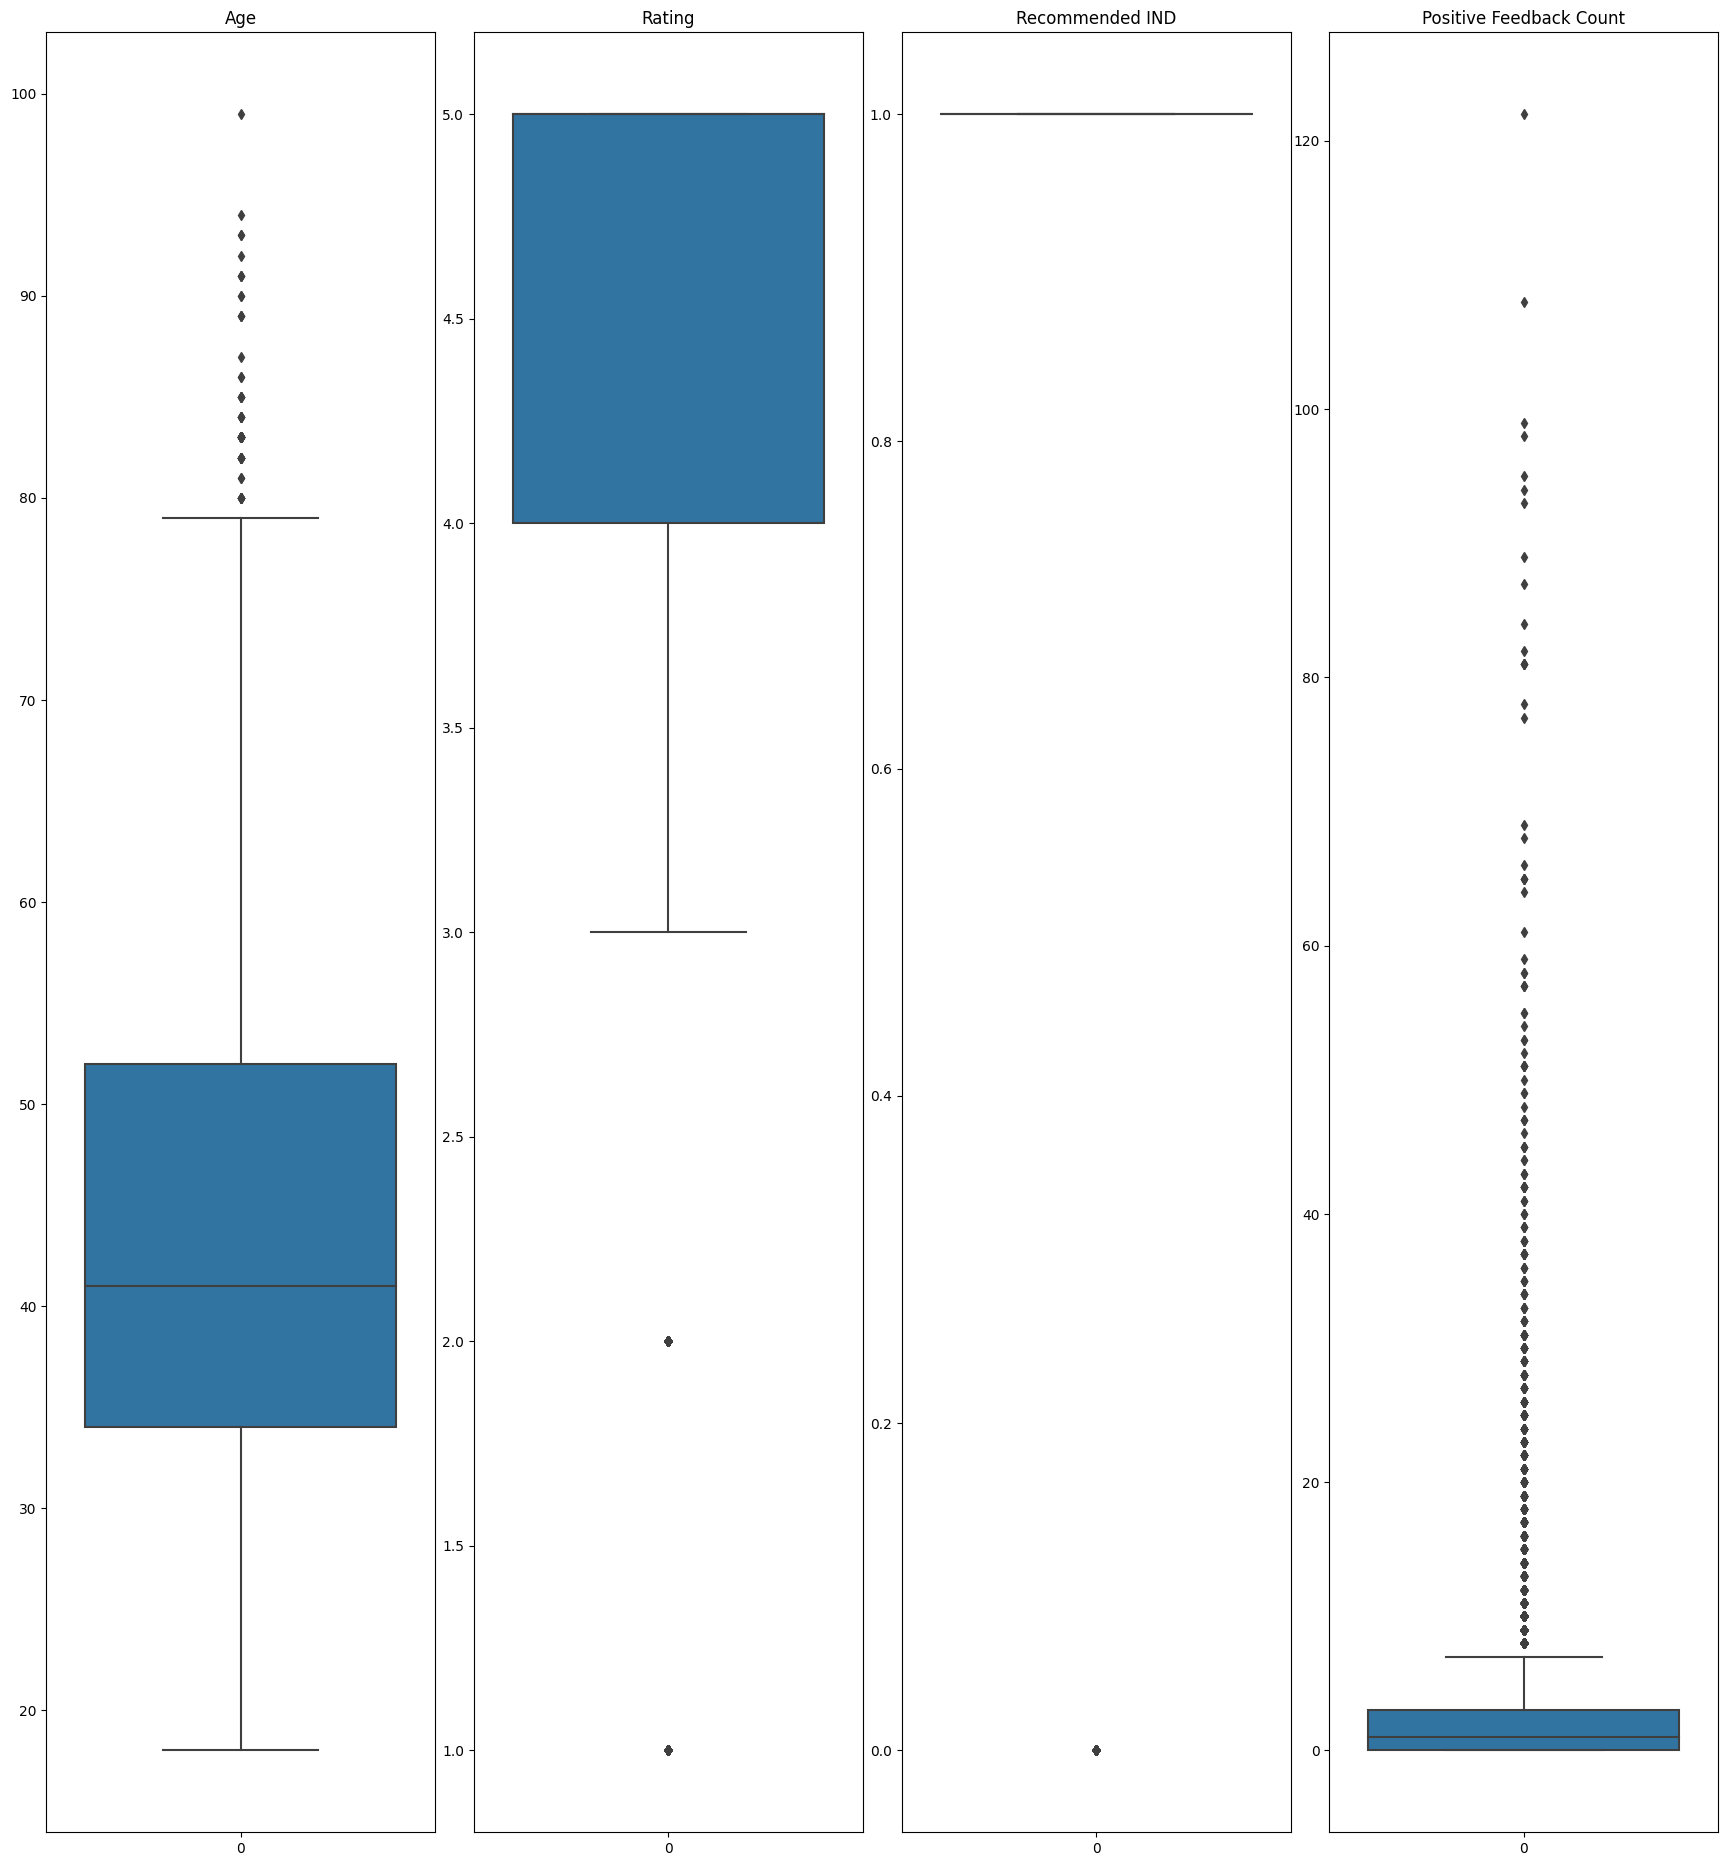

In [17]:
matplotlib.rcParams['figure.figsize'] = (15, 20)
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 5, i+1 )
    sns.boxplot(dataset[feature].values)
    plt.title(feature)
    plt.subplots_adjust(left=0.1, 
                        bottom=0.1,
                        right=1.5,
                        top=1,
                        wspace=0.1, 
                        hspace=0.9)
plt.show()

In [18]:
## Visualisation
#2.Dist plot and Hist plot

C:\Users\Ranik\AppData\Local\Temp\ipykernel_4116\91124801.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], bins = 20)
C:\Users\Ranik\AppData\Local\Temp\ipykernel_4116\91124801.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], bins = 20)
C:\Users\Ranik\App

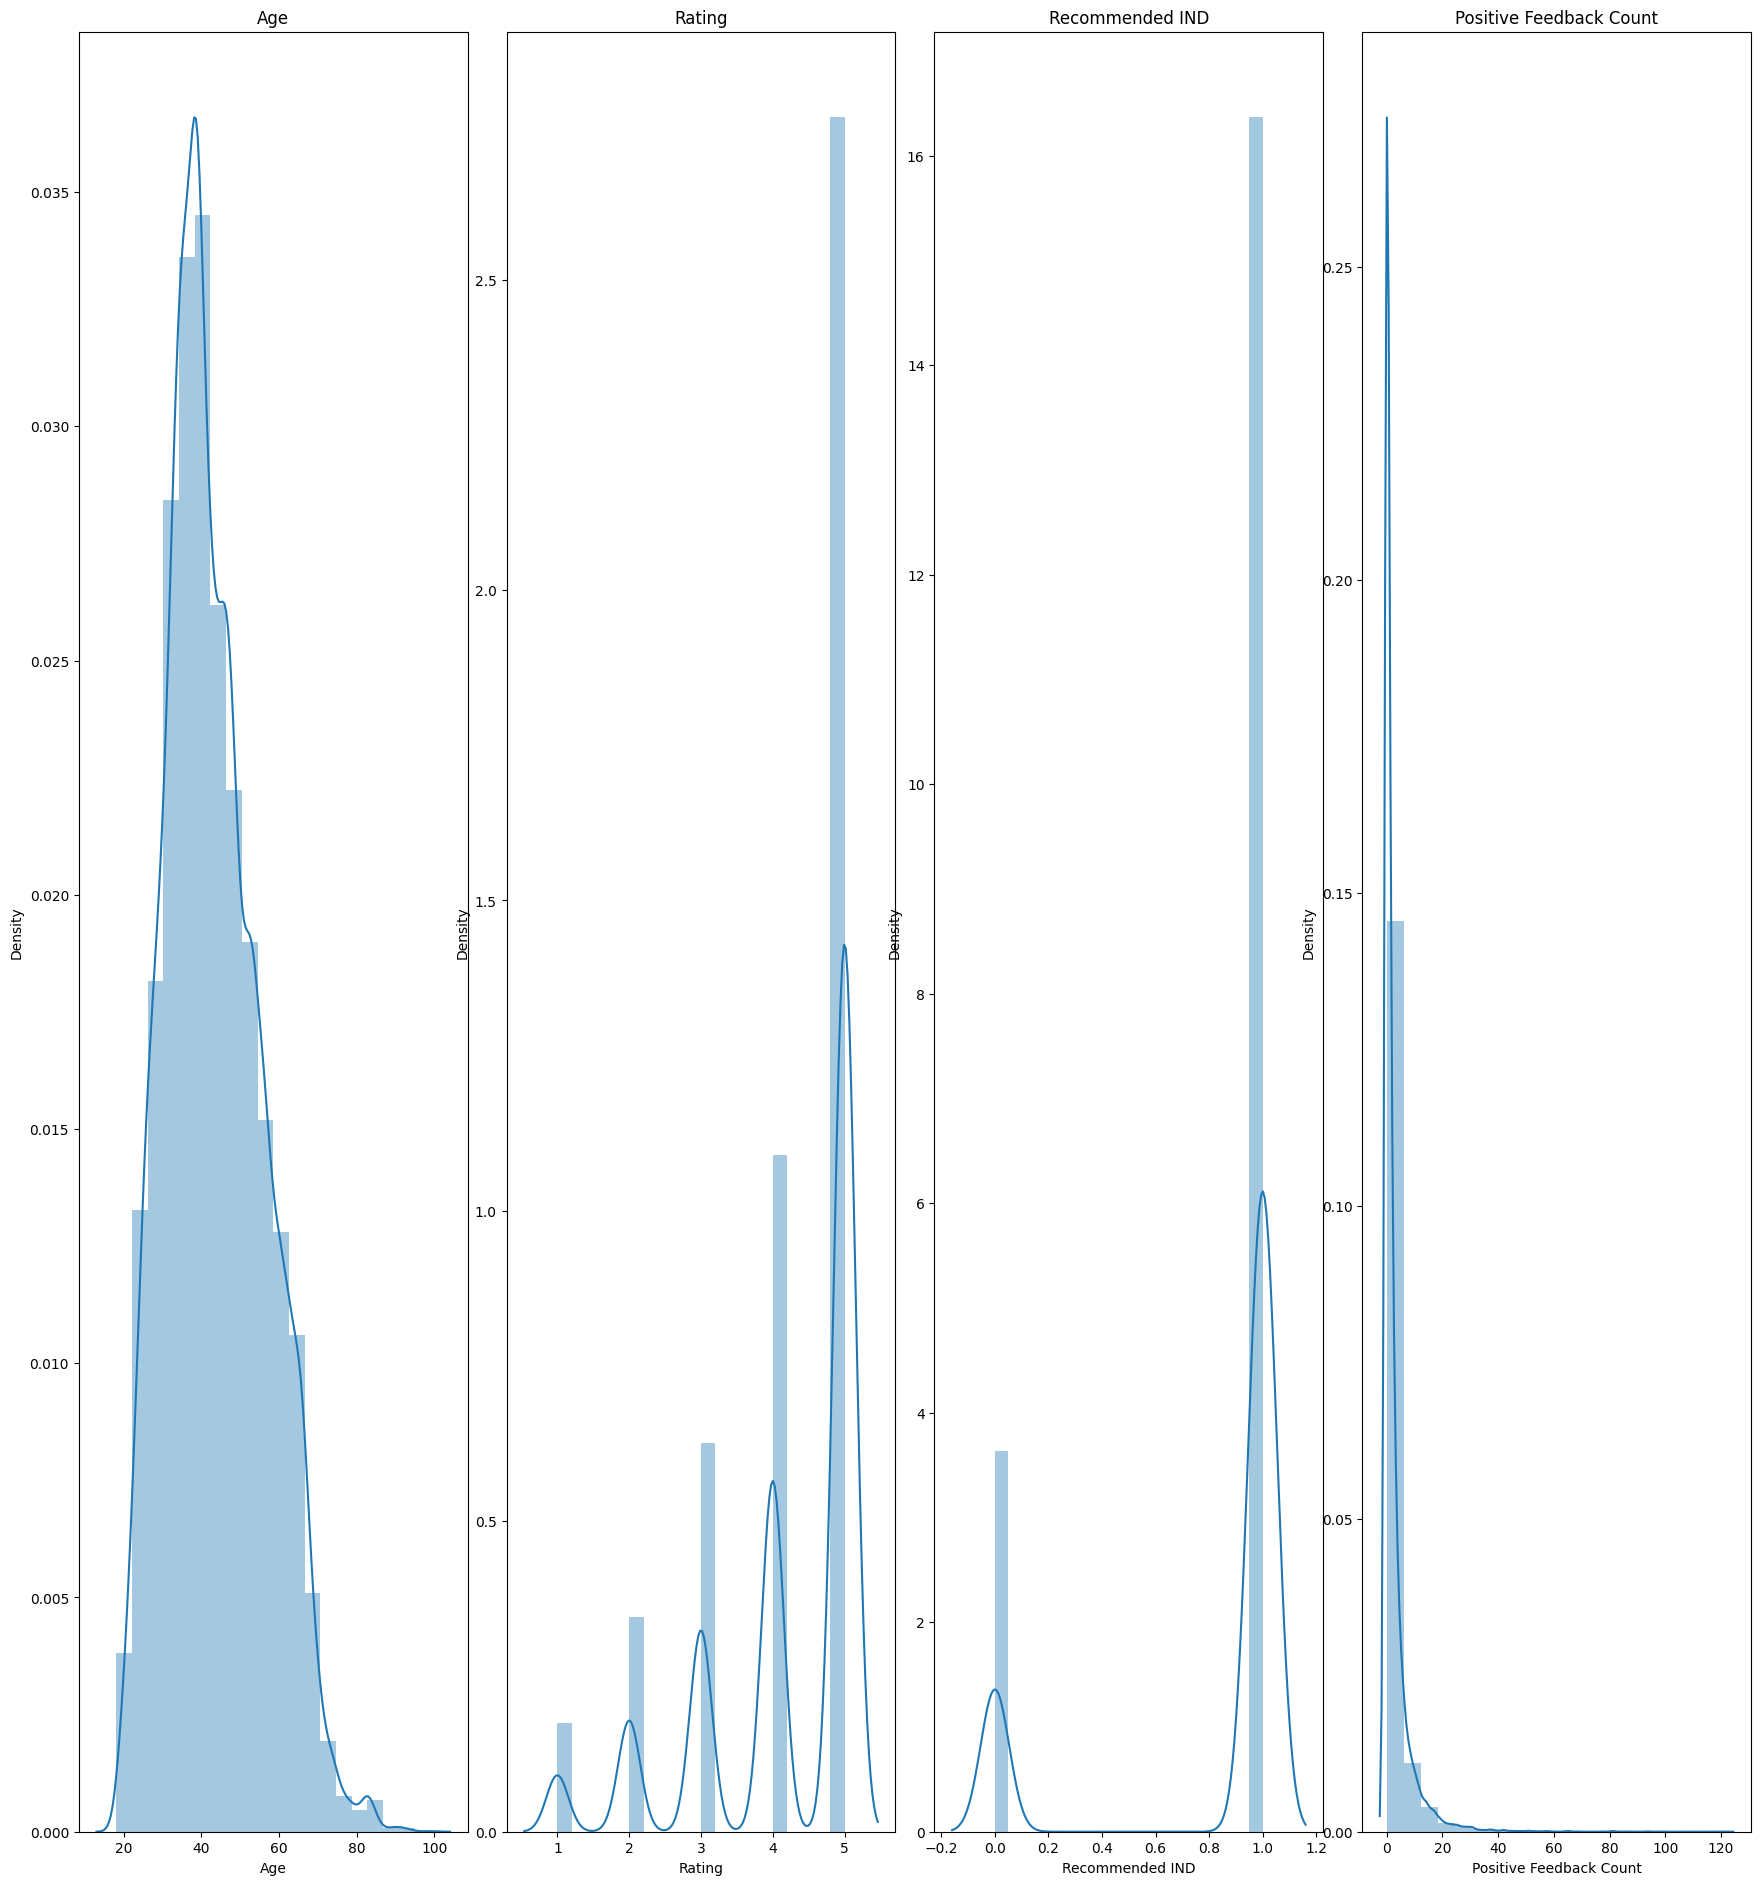

In [19]:
matplotlib.rcParams['figure.figsize'] = (15, 20)
for i,feature in enumerate(numerical_features):
    plt.subplot(1,5,i+1)
    sns.distplot(dataset[feature], bins = 20)
    plt.title(feature)
    plt.subplots_adjust(left=0.1, 
                        bottom=0.1,
                        right=1.5,
                        top=1,
                        wspace=0.1, 
                        hspace=0.9)
plt.show()

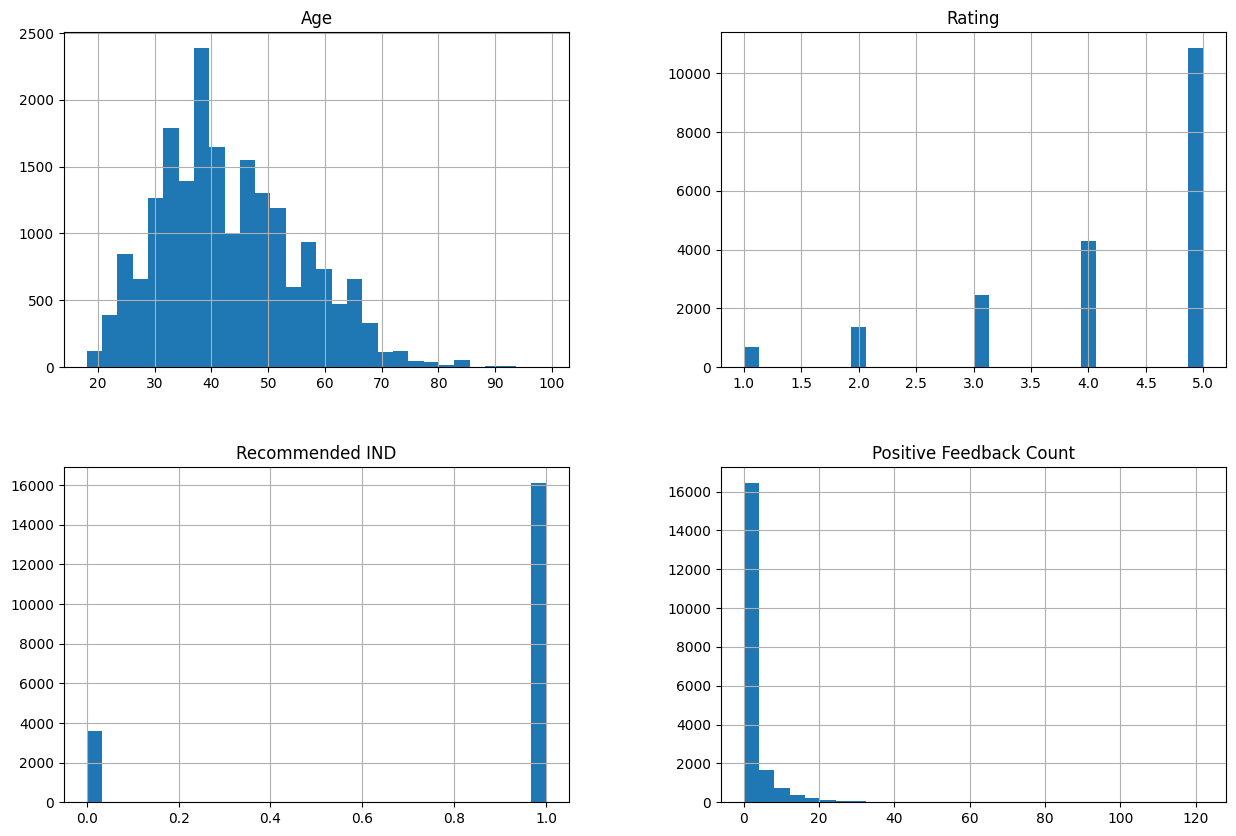

In [20]:
numerical_features.hist(bins = 30,
                       figsize=(15,10))
plt.show()

In [21]:
numerical_features.nunique()

Age                        77
Rating                      5
Recommended IND             2
Positive Feedback Count    79
dtype: int64

In [22]:
## Visualisation
#3. Correlation Matrix

In [23]:
dataset.corr()

,Age,Rating,Recommended IND,Positive Feedback Count
Age,1.000000,0.034910,0.035407,0.041167
Rating,0.034910,1.000000,0.793145,-0.056659
Recommended IND,0.035407,0.793145,1.000000,-0.059452
Positive Feedback Count,0.041167,-0.056659,-0.059452,1.000000


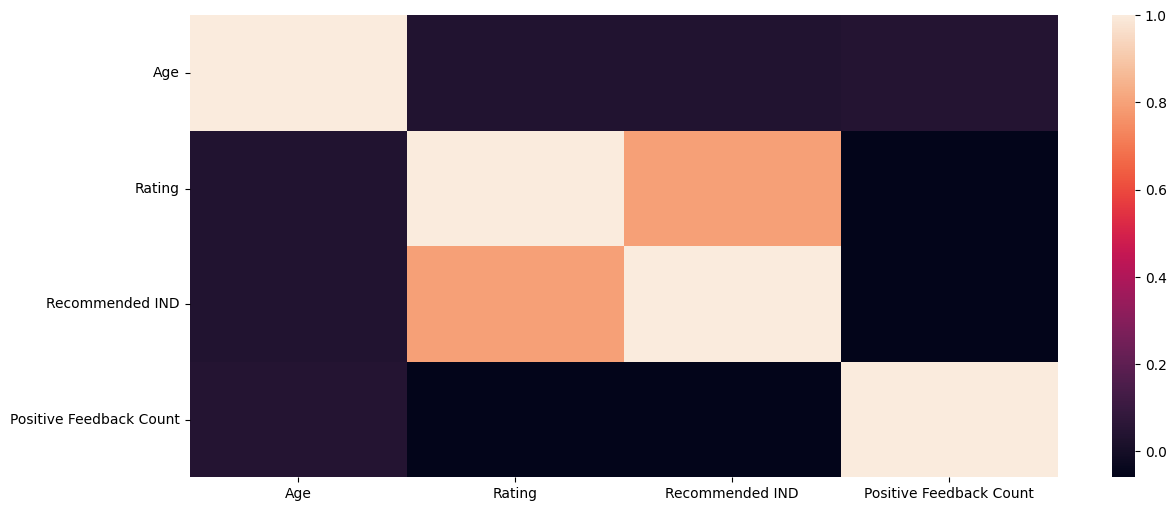

In [24]:
matplotlib.rcParams['figure.figsize'] = (14, 6)
sns.heatmap(dataset.corr())
plt.show()

## DATA ANALYSIS

In [25]:
Non_text_data = dataset[['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count', 
                         'Division Name', 'Department Name', 'Class Name']]

In [26]:
Non_text_data.nunique()

Age                        77
Rating                      5
Recommended IND             2
Positive Feedback Count    79
Division Name               3
Department Name             6
Class Name                 20
dtype: int64

In [27]:
#### 1. Which age group gave most positive recommendation?

In [28]:
potv_rev_age = dataset.groupby('Age')['Recommended IND'].sum().reset_index(name='counts')

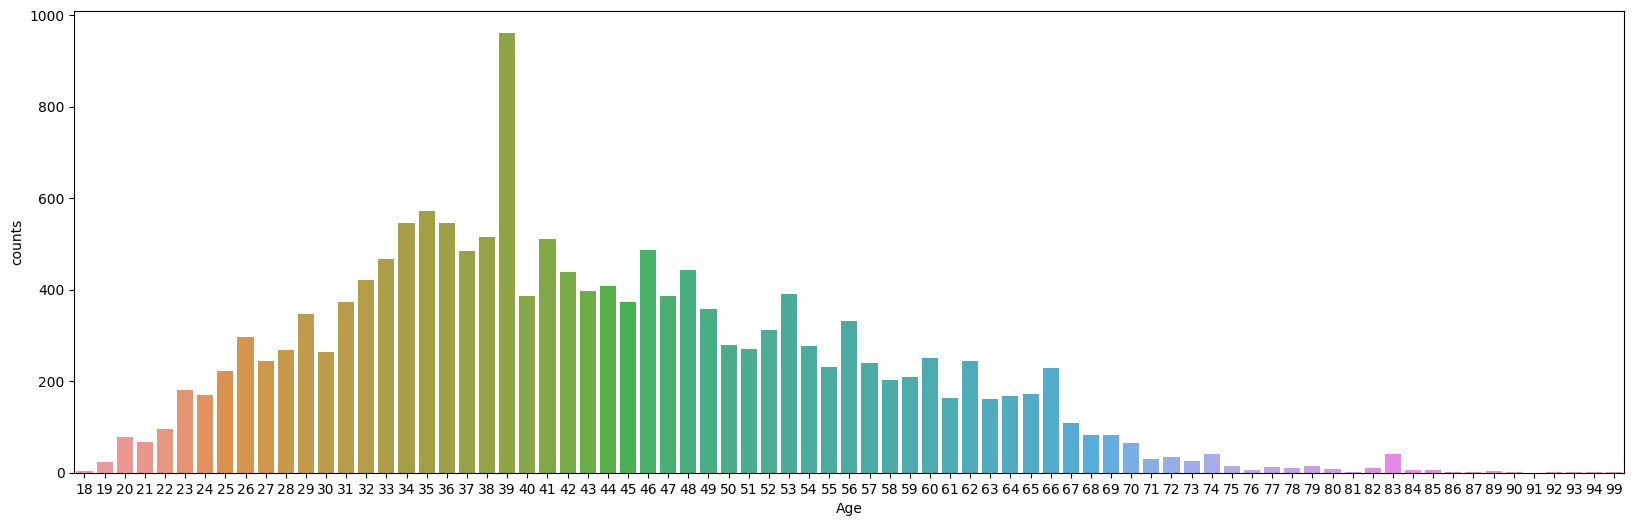

In [29]:
matplotlib.rcParams['figure.figsize'] = (20, 6)
sns.barplot(data=potv_rev_age, x="Age", y="counts")
plt.show()

In [30]:
### Observation:- Age 39 gave most positive recommendation.

In [31]:
# 2. Rating and Recommendation?

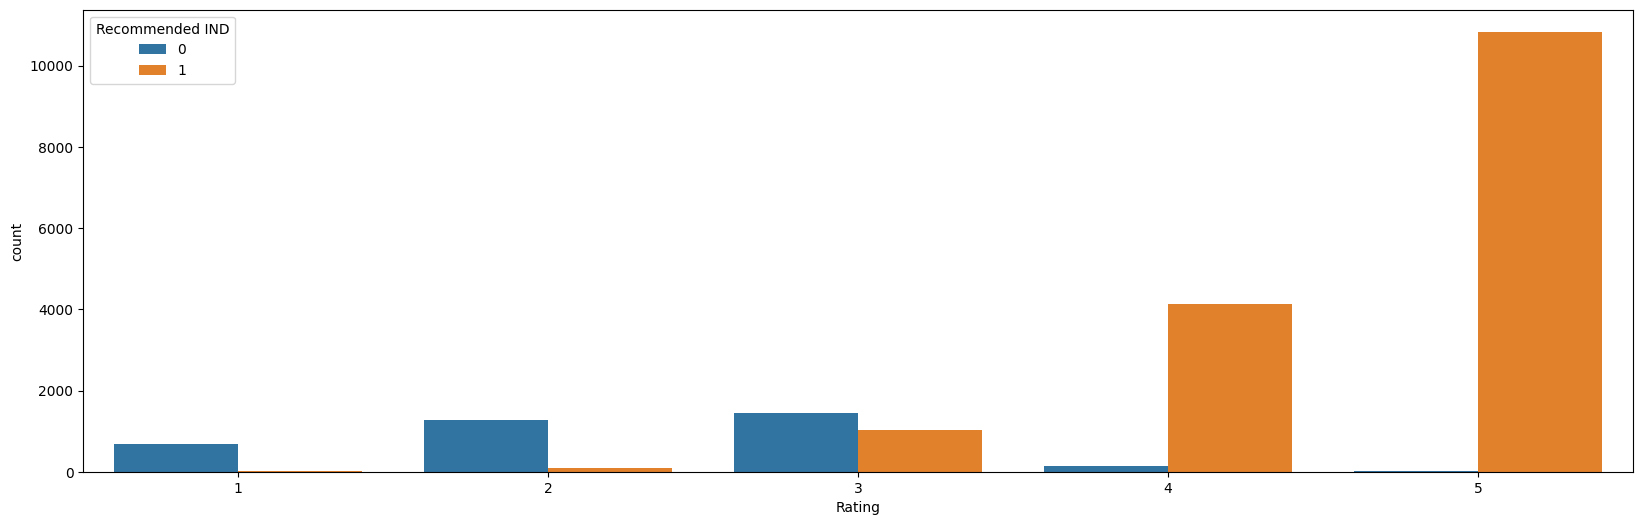

In [32]:
matplotlib.rcParams['figure.figsize'] = (20, 6)
sns.countplot(data=dataset, x="Rating", hue="Recommended IND")
plt.show()

In [33]:
dataset.groupby(['Rating','Recommended IND']).size().reset_index(name='recomnd_counts')

,Rating,Recommended IND,recomnd_counts
0,1,0,684
1,1,1,7
2,2,0,1280
3,2,1,80
4,3,0,1444
5,3,1,1020
6,4,0,146
7,4,1,4143
8,5,0,21
9,5,1,10837


In [34]:
### Observation:- More rating means most positive recommendation.

In [35]:
# 3 which department got most positive recomendation

In [36]:
potv_rec_division = dataset.groupby('Division Name')['Recommended IND'].sum().reset_index(name='Pos_rec_counts')
potv_rec_division.head()

,Division Name,Pos_rec_counts
0,General,9490
1,General Petite,5563
2,Initmates,1034


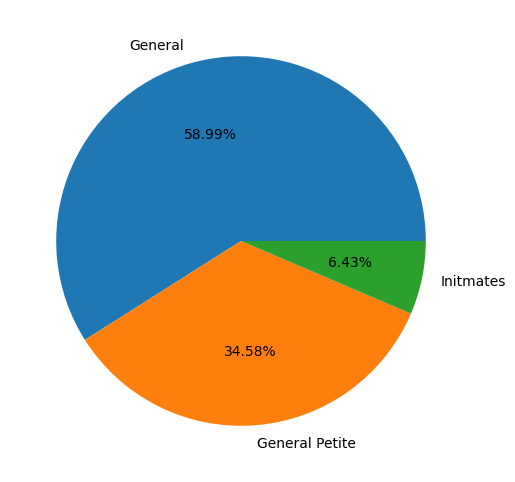

In [37]:
plt.pie(potv_rec_division['Pos_rec_counts'].values, 
        labels = potv_rec_division['Division Name'].values, autopct='%1.2f%%')
plt.show()

## Preprocessing -> train,test,split

In [38]:
dataset = (pd.read_csv(base_path + 'Womens_clothing_reviews.csv')
           .drop(['Unnamed: 0', 'Clothing ID'],axis = 1)
           .rename(columns = {'Recommended IND':'labels'}))
dataset.head()

,Age,Title,Review Text,Rating,labels,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [39]:
dataset = dataset.dropna(axis = 0, how ='any').reset_index()
dataset.shape

(19662, 10)

In [40]:
dataset["text"] = dataset['Title'].astype(str) +"- "+ dataset["Review Text"]
dataset = dataset.drop(['Title', 'index', 'Review Text'], axis=1)
dataset.head()

,Age,Rating,labels,Positive Feedback Count,Division Name,Department Name,Class Name,text
0,60,3,0,0,General,Dresses,Dresses,Some major design flaws- I had such high hopes...
1,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy!- I love, love, love this jump..."
2,47,5,1,6,General,Tops,Blouses,Flattering shirt- This shirt is very flatterin...
3,49,2,0,4,General,Dresses,Dresses,Not for the very petite- I love tracy reese dr...
4,39,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun- I aded this in my basket...


In [41]:
dataset_encoded = pd.get_dummies(dataset, columns = ['Division Name','Department Name', 'Class Name'])
dataset_encoded.head()

,Age,Rating,labels,Positive Feedback Count,text,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,60,3,0,0,Some major design flaws- I had such high hopes...,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50,5,1,0,"My favorite buy!- I love, love, love this jump...",0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,47,5,1,6,Flattering shirt- This shirt is very flatterin...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49,2,0,4,Not for the very petite- I love tracy reese dr...,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,39,5,1,1,Cagrcoal shimmer fun- I aded this in my basket...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
len(dataset_encoded)

19662

In [43]:
19662 - 1966 -984

16712

In [44]:
train_data, val_df, test_df = np.split(dataset_encoded.sample(frac=1), [int(.85*len(dataset_encoded)), int(.95 * len(dataset_encoded))])
print('Num examples train-val-test')
print(len(train_data), len(val_df), len(test_df))

Num examples train-val-test
16712 1966 984


In [45]:
train_data.head()

,Age,Rating,labels,Positive Feedback Count,text,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
15398,39,4,1,7,Love fox head print- This skirt is really pret...,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3431,66,5,1,2,Fun piece- I am not sure why this is listed on...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5253,58,5,1,1,Perfect white tunic- I ordered this online in ...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3094,43,5,1,9,Perfect with everything- I received this as a ...,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5400,31,3,0,0,Bought two mine didn't work- I got this as a g...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train_data['labels'].value_counts()

1    13661
0     3051
Name: labels, dtype: int64

In [47]:
pos = train_data[train_data['labels'] == 1].sample(n=3011)
neg = train_data[train_data['labels'] == 0].sample(n=3011)
train_df = pd.concat([pos,neg])
train_df.reset_index(inplace=True, drop=True)
len(pos), len(neg) , len(train_df)

(3011, 3011, 6022)

In [48]:
train_df.head()

,Age,Rating,labels,Positive Feedback Count,text,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,37,3,1,0,Cute- I wish these zipped up instead of the dr...,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,54,4,1,0,Pretty blouse- Most peasant tops have a lot of...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31,5,1,11,Loved so much i bought 2- Not usually one for ...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,64,5,1,0,So pretty!- I found this pretty sweater to run...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32,5,1,0,So soft!- Love love love! it's the perfect coz...,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
train_data.sample(frac=1).to_csv(base_path + 'train_data.csv', index = False)
train_df.sample(frac=1).to_csv(base_path + 'train.csv', index = False)
val_df.sample(frac=1).to_csv(base_path + 'val.csv', index = False)
test_df.sample(frac=1).to_csv(base_path + 'test.csv', index = False)

In [50]:
train_data = pd.read_csv(base_path + 'train_data.csv')
train_df = pd.read_csv(base_path + 'train.csv')
val_df = pd.read_csv(base_path + 'val.csv')
test_df = pd.read_csv(base_path + 'test.csv')

In [51]:
train_data.head()

,Age,Rating,labels,Positive Feedback Count,text,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,39,5,1,0,"Soft lace- This top is very pretty, i ordered ...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,32,5,1,1,"Love!- I bought this is in the gray color, alt...",1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,32,3,1,0,Super cute- Super cute skirt. i decided to ret...,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,52,5,1,0,Unique casual- I have featured photos below. i...,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,58,5,1,1,Beautiful color and so soft!- This is the perf...,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
len(train_df)

6022

In [53]:
test_df['labels'].value_counts()

1    808
0    176
Name: labels, dtype: int64

In [56]:
pos = test_df[test_df['labels'] == 1].sample(n=176)
neg = test_df[test_df['labels'] == 0].sample(n=176)
test_blncd_df = pd.concat([pos,neg])
test_blncd_df.reset_index(inplace=True, drop=True)
len(pos), len(neg) , len(test_blncd_df)
test_blncd_df.sample(frac=1).to_csv(base_path + 'test_blncd_df.csv', index = False)

In [57]:
test_blncd_df = pd.read_csv(base_path + 'test_blncd_df.csv')
test_blncd_df.head()

,Age,Rating,labels,Positive Feedback Count,text,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,29,2,0,4,Unflattering- As someone with a large chest an...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,3,0,5,"Cute, but not best quality- First, i love moth...",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,49,1,0,7,Dry clean?!- This is adorable but if it truly ...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,1,0,2,Can't get it on- I thought it was only me and ...,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,54,3,0,0,A mixed bag- I loved the shape of this sweater...,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
